In [8]:
import keras,os
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [9]:
base_model = tensorflow.keras.applications.vgg16.VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)
print(base_model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
data_folder = 'data - Copy/horse_photos'
pretrained_size = (224,224)
batch_size = 30



print("Getting Data...")
datagen = ImageDataGenerator(rescale=1./255, # normalizing pixel values
                             validation_split=0.3) # holding back 30% of the images in the dataset for validation

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    data_folder,
    target_size=pretrained_size, # resize the image to match model expected input
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    data_folder,
    target_size=pretrained_size, # resizing the image to match model expected input
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

classnames = list(train_generator.class_indices.keys())
print("class names: ", classnames)

Getting Data...
Preparing training dataset...
Found 351 images belonging to 5 classes.
Preparing validation dataset...
Found 149 images belonging to 5 classes.
class names:  ['AmericanBashkirCurly', 'AmericanPaintHorse', 'BelgianDraft', 'Friesian', 'ShetlandPony']


In [11]:
Model = Sequential()
Model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
Model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
Model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
Model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
Model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
Model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
Model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
Model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
Model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
Model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
Model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
Model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
Model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
Model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
Model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
Model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
Model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
Model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [12]:
Model.add(Flatten())
Model.add(Dense(units=4096,activation="relu"))
Model.add(Dense(units=4096,activation="relu"))
Model.add(Dense(units=5, activation="softmax"))

In [13]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
Model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                 

In [14]:
num_epochs = 30
history = Model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

Epoch 1/30
11/11 [==============================] - 283s 25s/step - loss: 1.6123 - accuracy: 0.1994 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 2/30
11/11 [==============================] - 215s 20s/step - loss: 1.6095 - accuracy: 0.2087 - val_loss: 1.6095 - val_accuracy: 0.1917
Epoch 3/30
11/11 [==============================] - 286s 26s/step - loss: 1.6096 - accuracy: 0.2056 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 4/30
11/11 [==============================] - 290s 26s/step - loss: 1.6095 - accuracy: 0.1931 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 5/30
11/11 [==============================] - 286s 26s/step - loss: 1.6102 - accuracy: 0.1900 - val_loss: 1.6091 - val_accuracy: 0.2000
Epoch 6/30
11/11 [==============================] - 284s 26s/step - loss: 1.6096 - accuracy: 0.2118 - val_loss: 1.6094 - val_accuracy: 0.2083
Epoch 7/30
11/11 [==============================] - 291s 26s/step - loss: 1.6095 - accuracy: 0.1963 - val_loss: 1.6091 - val_accuracy: 0.2000
Epoch 

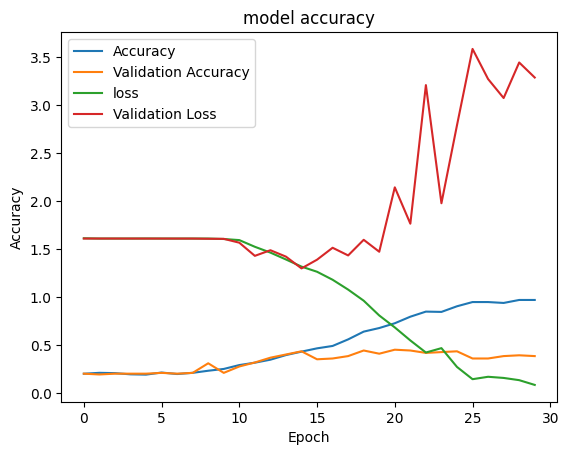

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [16]:
modelFileName = 'models/horses_VGG.h5'
Model.save(modelFileName)
del Model  
print('model saved as', modelFileName)

c:\Users\jeanp\OneDrive\Desktop\Thesis Environment\ipcv-env\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


model saved as models/horses_VGG.h5


Generating predictions from validation data...
1/1 [==============================] - 6s 6s/step


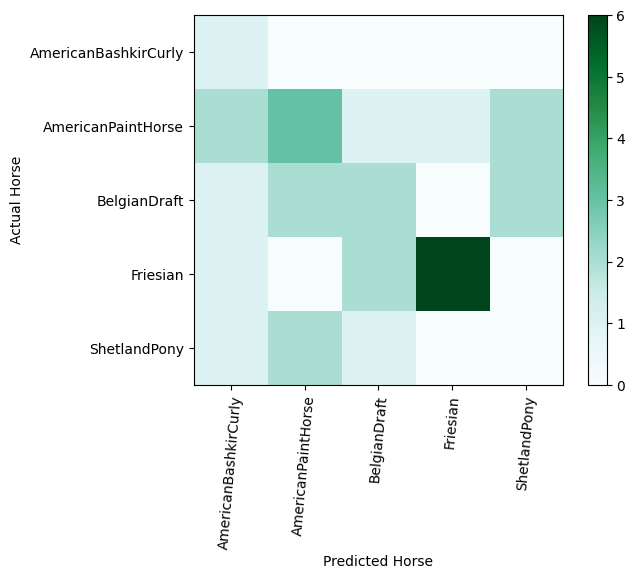

In [17]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

model = keras.models.load_model('models/horses_VGG.h5')

print("Generating predictions from validation data...")
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

class_probabilities = model.predict(x_test)

predictions = np.argmax(class_probabilities, axis=1)

true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap = plt.cm.BuGn)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Predicted Horse")
plt.ylabel("Actual Horse")
plt.show()

In [18]:
import os
import numpy as np
import tensorflow
from  tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input


model = keras.models.load_model('models/horses_VGG.h5')

image_folder = './inferencing'
image_files = os.listdir(image_folder)

img_width, img_height = 224, 224

preprocessed_images = []
for img_file in image_files:
    img_path = os.path.join(image_folder, img_file)
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_array)
    preprocessed_images.append(img_preprocessed)

predictions = [model.predict(img) for img in preprocessed_images]


classnames = os.listdir(os.path.join('data', 'Horse_photos'))
classnames.sort()

for i, img_file in enumerate(image_files):
    index = int(np.argmax(predictions[i], axis=1)[0])
    print(f"Prediction for {img_file}: {predictions[i]} Class:{classnames[index]}")

1/1 [==============================] - 0s 187ms/step
Prediction for ABC1.jpg: [[1. 0. 0. 0. 0.]] Class:AmericanBashkirCurly
Prediction for ABC2.jpg: [[0. 0. 1. 0. 0.]] Class:BelgianDraft
Prediction for ABC3.jpg: [[0. 0. 1. 0. 0.]] Class:BelgianDraft
Prediction for ABC4.jpg: [[0. 0. 0. 0. 1.]] Class:ShetlandPony
Prediction for AP1.jpg: [[0. 0. 0. 1. 0.]] Class:Friesian
Prediction for AP2.jpg: [[0. 0. 1. 0. 0.]] Class:BelgianDraft
Prediction for AP3.jpg: [[1. 0. 0. 0. 0.]] Class:AmericanBashkirCurly
Prediction for AP4.jpg: [[1. 0. 0. 0. 0.]] Class:AmericanBashkirCurly
Prediction for BD1.jpg: [[0. 0. 1. 0. 0.]] Class:BelgianDraft
Prediction for BD2.jpg: [[0. 0. 1. 0. 0.]] Class:BelgianDraft
Prediction for BD3.jpg: [[0. 0. 1. 0. 0.]] Class:BelgianDraft
Prediction for BD4.jpg: [[0. 0. 0. 1. 0.]] Class:Friesian
Prediction for F1.jpg: [[1. 0. 0. 0. 0.]] Class:AmericanBashkirCurly
Prediction for F2.jpg: [[1. 0. 0. 0. 0.]] Class:AmericanBashkirCurly
Prediction for F3.jpg: [[0. 0. 0. 1. 0.]] Cla